In [1]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *
import pandas as pd

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Poverty


In [2]:
#Load table, already cleaned in Excel
poverty = Table.read_table('./poverty.csv')
poverty

Year,Baltimore City,Baltimore County
2003,0.27,0.099
2004,0.266,0.1
2005,0.309,0.088
2006,0.255,0.096
2007,0.27,0.092
2008,0.245,0.097
2009,0.282,0.102
2010,0.343,0.11
2011,0.356,0.125
2012,0.334,0.13


In [3]:
#Calculate average poverty rate
np.mean(poverty.column('Baltimore City'))

0.29815000000000003

In [4]:
#Calculate average poverty rate
np.mean(poverty.column('Baltimore County'))

0.11395000000000002

In [5]:
#Calculate rate
povertytimes = (np.mean(poverty.column('Baltimore City')) / np.mean(poverty.column('Baltimore County')))
povertytimes

2.6164984642387008

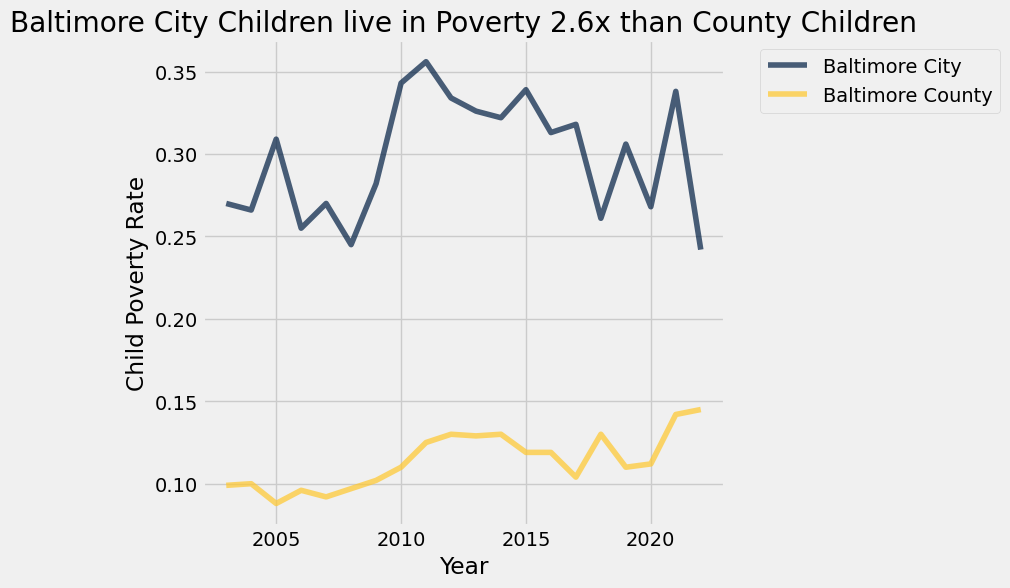

In [49]:
#Plot table
poverty.plot('Year')
plots.ylabel("Child Poverty Rate")
plots.title('Baltimore City Children live in Poverty 2.6x than County Children');

# Household Type

In [7]:
#Load table (cleaned in Excel)
household = Table.read_table('./household.csv')
household

Household Type,Baltimore City,Baltimore County
Married Couple,0.34,0.57
Father Only,0.07,0.06
Mother Only,0.3,0.19
Non-family,0.29,0.18


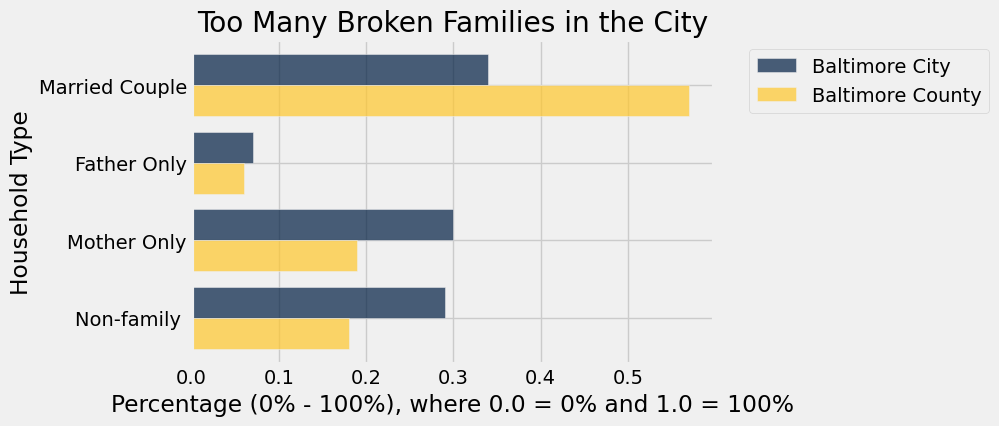

In [50]:
#Plot barchart
household.barh('Household Type')
plots.xlabel('Percentage (0% - 100%), where 0.0 = 0% and 1.0 = 100%')
plots.title('Too Many Broken Families in the City');

# Income

In [9]:
#Load table (cleaned in Excel)
income = Table.read_table('./income.csv')
income

Year,Baltimore,Maryland
2007,36700,80300
2008,38400,82900
2009,37100,82200
2010,37200,80800
2011,35100,81500
2012,36700,82600
2013,41800,83700
2014,38300,87800
2015,41300,88900
2016,48300,91700


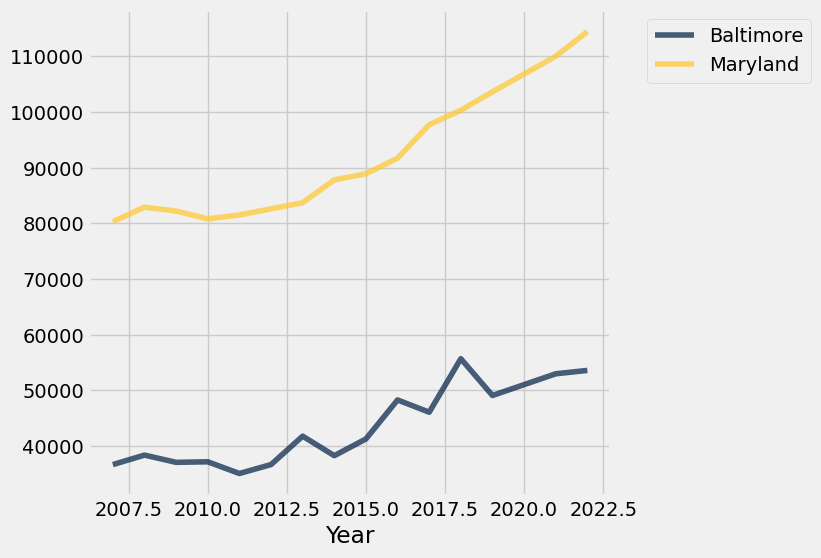

In [10]:
#Not used because there was no idea between Baltimore City and County, not looking to compare entire state of Maryland to Baltimore
income.plot('Year')
#households with children

# Education

In [11]:
#Load table (cleaned in Excel)
education = Table.read_table('./education.csv')
education

Reading Performance,Baltimore City,Baltimore County
Meets/Exceeds,0.15,0.33
Not Meeting/Exceeding,0.85,0.67


In [12]:
#Drop first row, unneccesary to include both rows in barchart
education1 = education.exclude(0)
education1

Reading Performance,Baltimore City,Baltimore County
Not Meeting/Exceeding,0.85,0.67


Text(0.5, 1.0, 'Baltimore City Students Perform Worse in School than County Students')

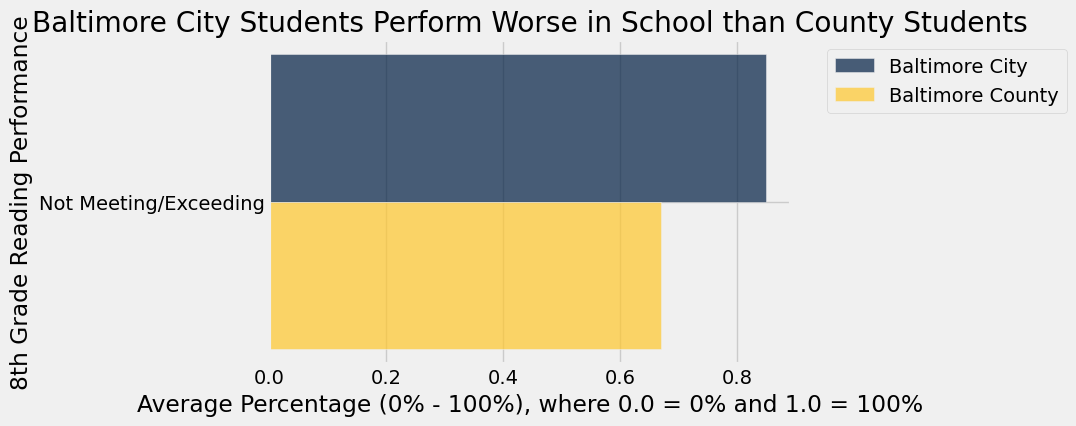

In [48]:
#Plot education table
education1.barh('Reading Performance')
plots.ylabel('8th Grade Reading Performance')
plots.xlabel('Average Percentage (0% - 100%), where 0.0 = 0% and 1.0 = 100%')
plots.title('Baltimore City Students Perform Worse in School than County Students')

# Dropout

In [14]:
#Load Table
dropout = Table.read_table('./Dropout rate.csv')
dropout

LocationType,Location,TimeFrame,DataFormat,Data
State,Maryland,2003-2004,Number,10694
State,Maryland,2003-2004,Percent,0.0385
State,Maryland,2004-2005,Number,10443
State,Maryland,2004-2005,Percent,0.0368
State,Maryland,2005-2006,Number,10384
State,Maryland,2005-2006,Percent,0.036
State,Maryland,2006-2007,Number,10232
State,Maryland,2006-2007,Percent,0.0351
State,Maryland,2007-2008,Number,9815
State,Maryland,2007-2008,Percent,0.034


In [15]:
#Table to select relevant columns and rows with percentage data only
dropout1=dropout.where('DataFormat', 'Percent').select('Location', 'TimeFrame', 'Data')
dropout1

Location,TimeFrame,Data
Maryland,2003-2004,0.0385
Maryland,2004-2005,0.0368
Maryland,2005-2006,0.036
Maryland,2006-2007,0.0351
Maryland,2007-2008,0.034
Maryland,2008-2009,0.028
Maryland,2009-2010,0.0254
Maryland,2010-2011,0.0318
Maryland,2011-2012,0.0345
Maryland,2012-2013,0.0296


In [16]:
#Array to assign year to dropout percentage rate to Baltimore City and Baltimore County location
dropout2 = Table().with_columns(
    'Year', [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,],
    'Baltimore City', dropout1.where('Location', 'Baltimore City').column('Data'),
    'Baltimore County', dropout1.where('Location', 'Baltimore County').column('Data')
)
         
dropout2

Year,Baltimore City,Baltimore County
2004,0.1165,0.0431
2005,0.1169,0.0439
2006,0.1026,0.0409
2007,0.0937,0.0339
2008,0.0791,0.0434
2009,0.062,0.0347
2010,0.047,0.0303
2011,0.0419,0.0357
2012,0.0553,0.0333
2013,0.0452,0.0293


In [17]:
dropout3 = dropout2.exclude(19)
dropout3

Year,Baltimore City,Baltimore County
2004,0.1165,0.0431
2005,0.1169,0.0439
2006,0.1026,0.0409
2007,0.0937,0.0339
2008,0.0791,0.0434
2009,0.062,0.0347
2010,0.047,0.0303
2011,0.0419,0.0357
2012,0.0553,0.0333
2013,0.0452,0.0293


In [18]:
#Calculate average dropout rate from 2004-2022
np.mean(dropout3.column('Baltimore City'))

0.069926315789473698

In [19]:
#Calculate average dropout rate from 2004-2022
np.mean(dropout3.column('Baltimore County'))

0.033889473684210532

In [20]:
#Calculate ratio of dropout rate
dropoutrate = (np.mean(dropout3.column('Baltimore City')) / np.mean(dropout3.column('Baltimore County')))
dropoutrate

2.0633638763783195

Text(0.5, 1.0, 'Baltimore City Students dropout of school 2x more than County Students')

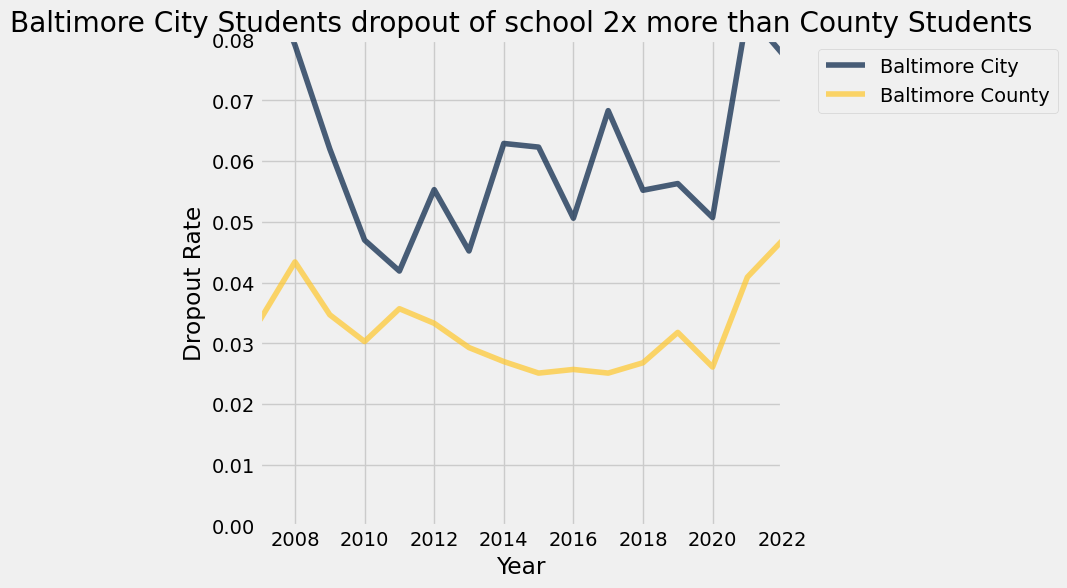

In [47]:
#Plot table with adjustment to x and y-axes
dropout2.plot('Year')
plots.xlim(2007, 2022)
plots.ylim(0, 0.08)
plots.ylabel('Dropout Rate')
plots.title('Baltimore City Students dropout of school 2x more than County Students')

# MIDDLE SCHOOL YOUTH RISK BEHAVIOR SURVEY/YOUTH TOBACCO SURVEY

In [22]:
#Load Table
survey = Table.read_table('./survey.csv')
survey

LocationType,Location,Category,TimeFrame,DataFormat,Data
State,Maryland,Ever feel sad or hopeless,2013-14,Percent,0.24886
State,Maryland,Ever considered attempting suicide,2013-14,Percent,0.191
State,Maryland,Ever alcohol use,2013-14,Percent,0.2519
State,Maryland,Ever marijuana use,2013-14,Percent,0.09037
State,Maryland,Physically active for at least 60 minutes for 5 or more days,2013-14,Percent,0.52528
State,Maryland,Ever feel sad or hopeless,2014-15,Percent,0.21257
State,Maryland,Ever considered attempting suicide,2014-15,Percent,0.17613
State,Maryland,Current tobacco use,2014-15,Percent,0.11058
State,Maryland,Ever alcohol use,2014-15,Percent,0.17617
State,Maryland,Ever marijuana use,2014-15,Percent,0.0702


In [23]:
#Select relevant columns
survey1 = survey.select('Location', 'Category', 'TimeFrame', 'Data')
survey1

Location,Category,TimeFrame,Data
Maryland,Ever feel sad or hopeless,2013-14,0.24886
Maryland,Ever considered attempting suicide,2013-14,0.191
Maryland,Ever alcohol use,2013-14,0.2519
Maryland,Ever marijuana use,2013-14,0.09037
Maryland,Physically active for at least 60 minutes for 5 or more days,2013-14,0.52528
Maryland,Ever feel sad or hopeless,2014-15,0.21257
Maryland,Ever considered attempting suicide,2014-15,0.17613
Maryland,Current tobacco use,2014-15,0.11058
Maryland,Ever alcohol use,2014-15,0.17617
Maryland,Ever marijuana use,2014-15,0.0702


In [24]:
#Calculate average percentage of each category between the years 

city_sad = survey1.where('Location', 'Baltimore City').where('Category', 'Ever feel sad or hopeless').column('Data')
np.mean(city_sad)

city_suicide = survey1.where('Location', 'Baltimore City').where('Category', 'Ever considered attempting suicide').column('Data')
np.mean(city_suicide)

city_alcohol = survey1.where('Location', 'Baltimore City').where('Category', 'Ever alcohol use').column('Data')
np.mean(city_alcohol)

city_marijuana = survey1.where('Location', 'Baltimore City').where('Category', 'Ever marijuana use').column('Data')
np.mean(city_marijuana)

city_active = survey1.where('Location', 'Baltimore City').where('Category', 'Physically active for at least 60 minutes for 5 or more days').column('Data')
np.mean(city_active)

city_tobacco = survey1.where('Location', 'Baltimore City').where('Category', 'Current tobacco use').column('Data')
np.mean(city_tobacco)

city_sex = survey1.where('Location', 'Baltimore City').where('Category', 'Ever Had Sexual Intercourse').column('Data')
np.mean(city_sex)

C:\Users\Dang Nguyen\anaconda4\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Dang Nguyen\anaconda4\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

In [25]:
#Calculate average percentage of each category between the years 
county_sad = survey1.where('Location', 'Baltimore County').where('Category', 'Ever feel sad or hopeless').column('Data')
np.mean(county_sad)

county_suicide = survey1.where('Location', 'Baltimore County').where('Category', 'Ever considered attempting suicide').column('Data')
np.mean(county_suicide)

county_alcohol = survey1.where('Location', 'Baltimore County').where('Category', 'Ever alcohol use').column('Data')
np.mean(county_alcohol)

county_marijuana = survey1.where('Location', 'Baltimore County').where('Category', 'Ever marijuana use').column('Data')
np.mean(county_marijuana)

county_active = survey1.where('Location', 'Baltimore County').where('Category', 'Physically active for at least 60 minutes for 5 or more days').column('Data')
np.mean(county_active)

county_tobacco = survey1.where('Location', 'Baltimore County').where('Category', 'Current tobacco use').column('Data')
np.mean(county_tobacco)

county_sex = survey1.where('Location', 'Baltimore County').where('Category', 'Ever Had Sexual Intercourse').column('Data')
np.mean(county_sex)

nan

In [26]:
#Array to create mean of students that used the category of drug/alcohol in the city and county
survey2 = Table().with_columns(
    'Category', ['Alcohol', 'Marijuana', 'Tobacco'],
    'Baltimore City', [np.mean(city_alcohol), np.mean(city_marijuana), np.mean(city_tobacco)],
    'Baltimore County', [np.mean(county_alcohol), np.mean(county_marijuana), np.mean(county_tobacco)]
)
         
survey2

Category,Baltimore City,Baltimore County
Alcohol,0.271863,0.210245
Marijuana,0.137905,0.0757525
Tobacco,0.116793,0.0955467


In [27]:
#Calculate difference of alcohol use between city/county
a = np.mean(city_alcohol) - np.mean(county_alcohol)
a

0.061617500000000019

In [28]:
#Calculate difference of marijuana use between city/county
b = np.mean(city_marijuana) - np.mean(county_marijuana)
b

0.062152499999999999

In [29]:
#Calculate difference of tobacco use between city/county
c = np.mean(city_tobacco) - np.mean(county_tobacco)
c

0.021246666666666678

Text(0.5, 1.0, 'Baltimore City Students use drugs & alcohol more than County Students')

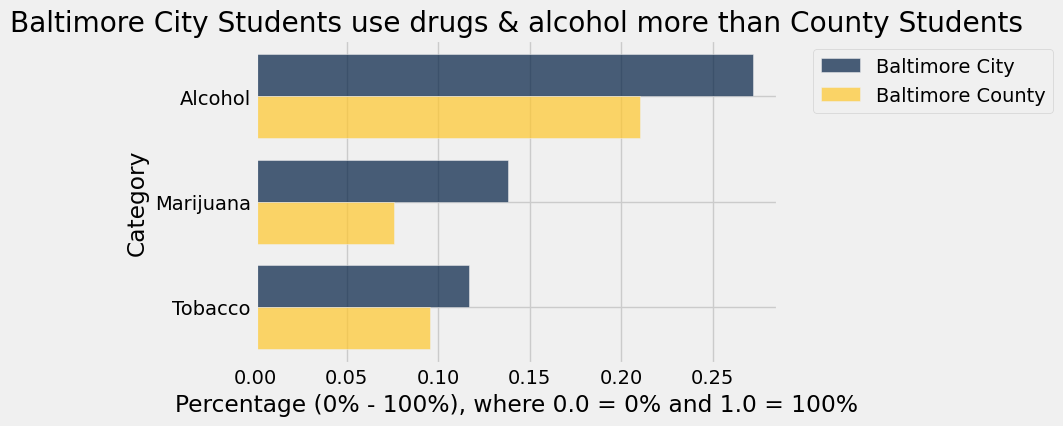

In [46]:
survey2.barh('Category')
plots.xlabel('Percentage (0% - 100%), where 0.0 = 0% and 1.0 = 100%')
plots.title('Baltimore City Students use drugs & alcohol more than County Students')

In [31]:
#Array to assign average percentage to their respected categories
survey3 = Table().with_columns(
    'Category', ['Felt Sad/Hopeless', 'Considered Suicide', 'Physically Active'],
    'Baltimore City', [np.mean(city_sad), np.mean(city_suicide), np.mean(city_active)],
    'Baltimore County', [np.mean(county_sad), np.mean(county_suicide), np.mean(county_active)]
)
         
survey3

Category,Baltimore City,Baltimore County
Felt Sad/Hopeless,0.278585,0.251702
Considered Suicide,0.2592,0.211993
Physically Active,0.401775,0.505532


In [32]:
#Calculating difference
d = np.mean(city_sad) - np.mean(county_sad)
d

0.026882499999999976

In [33]:
#Calculating difference
e = np.mean(city_suicide) - np.mean(county_suicide)
e

0.047207499999999986

In [34]:
#Calculating difference
f = np.mean(city_active) - np.mean(county_active)
f

-0.10375749999999989

Text(0.5, 0, 'Percentage (0% - 100%), where 0.0 = 0% and 1.0 = 100%')

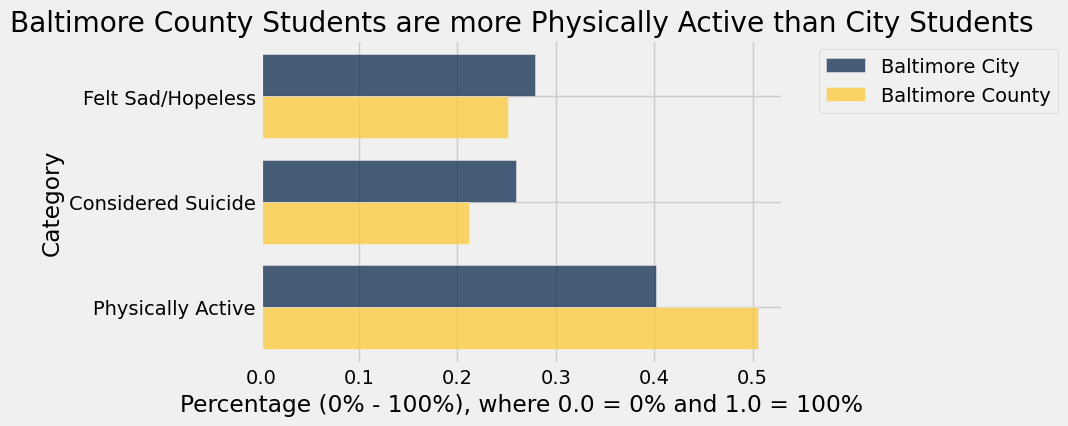

In [45]:
survey3.barh('Category')
plots.title('Baltimore County Students are more Physically Active than City Students')
plots.xlabel('Percentage (0% - 100%), where 0.0 = 0% and 1.0 = 100%')

# Teenage Pregnancy

In [36]:
#load table
teen = Table.read_table('./teen.csv')
teen

LocationType,Location,TimeFrame,DataFormat,Data
State,Maryland,2003,Rate,33.3
State,Maryland,2004,Rate,32.3
State,Maryland,2005,Rate,31.8
State,Maryland,2006,Rate,33.6
State,Maryland,2007,Rate,34.4
State,Maryland,2008,Rate,32.7
State,Maryland,2009,Rate,31.2
State,Maryland,2010,Rate,27.2
State,Maryland,2011,Rate,24.7
State,Maryland,2012,Rate,22.1


In [37]:
#Select relevant columns
teen1 = teen.select('Location', 'TimeFrame', 'Data')
teen1

Location,TimeFrame,Data
Maryland,2003,33.3
Maryland,2004,32.3
Maryland,2005,31.8
Maryland,2006,33.6
Maryland,2007,34.4
Maryland,2008,32.7
Maryland,2009,31.2
Maryland,2010,27.2
Maryland,2011,24.7
Maryland,2012,22.1


In [38]:
#Array to assign year to pregnacy rate corresponding to the county and city
teen2 = Table().with_columns(
    'Year', [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,],
    'Baltimore City', teen1.where('Location', 'Baltimore City').column('Data'),
    'Baltimore County', teen1.where('Location', 'Baltimore County').column('Data')
)
         
teen2

Year,Baltimore City,Baltimore County
2003,71.1,27
2004,68.2,26.3
2005,66.2,23.6
2006,66.9,27.8
2007,66.4,28.2
2008,63.7,27
2009,64.4,25.2
2010,53.3,22.5
2011,50.7,21.5
2012,46.9,17.2


In [39]:
np.mean(teen2.column('Baltimore City'))

47.968421052631577

In [40]:
np.mean(teen2.column('Baltimore County'))

19.284210526315789

In [41]:
teenrate = (np.mean(teen2.column('Baltimore City')) / np.mean(teen2.column('Baltimore County')))
teenrate

2.4874454148471616

Text(0, 0.5, 'Birth Rate per 1,000 Females Aged 15-19')

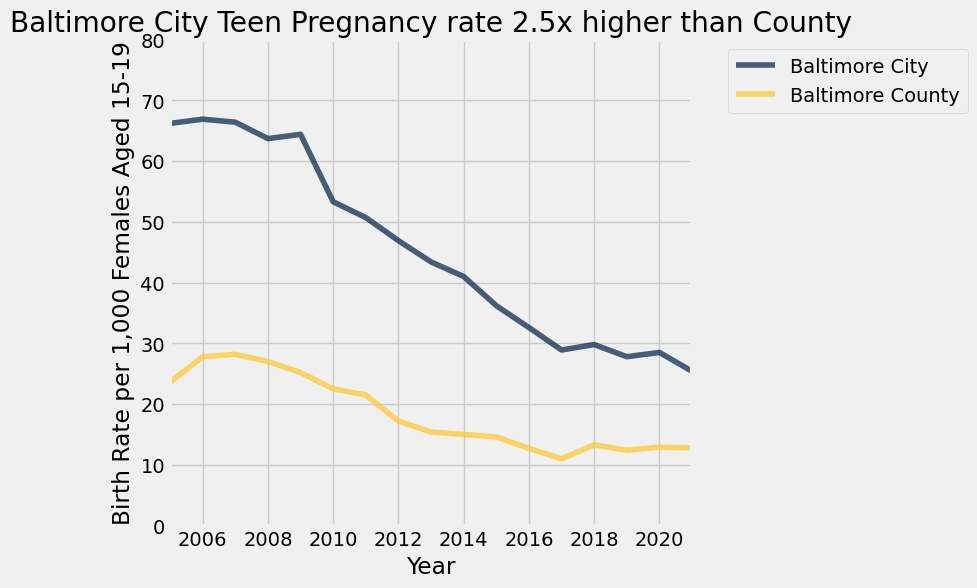

In [44]:
#Plotting graph
teen2.plot('Year')
plots.xlim(2005, 2021)
plots.ylim(0, 80)
plots.title('Baltimore City Teen Pregnancy rate 2.5x higher than County')
plots.ylabel('Birth Rate per 1,000 Females Aged 15-19')